In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

In [2]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Add 'EstimatedSalary' to the list of columns to remove
dataset = dataset.drop(['User ID', 'Gender', 'EstimatedSalary'], axis=1)

# Display the first few rows to confirm the change
print(dataset.head())

   Age  Purchased
0   19          0
1   35          0
2   26          0
3   27          0
4   19          0


<Axes: xlabel='Age', ylabel='Purchased'>

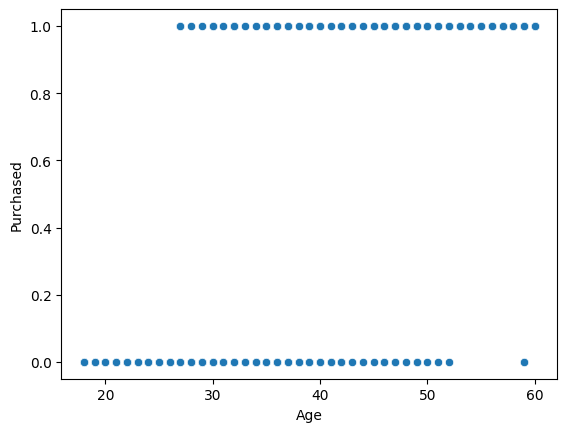

In [4]:
sns.scatterplot(data=dataset, x='Age', y='Purchased')

In [5]:
x = dataset[["Age"]]
y = dataset[["Purchased"]]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

c:\Users\Aamir Neyazi\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [8]:
lr.score(x_test, y_test) * 100

91.25

In [9]:
lr.predict([[30]])

c:\Users\Aamir Neyazi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

<Axes: xlabel='Age', ylabel='Purchased'>

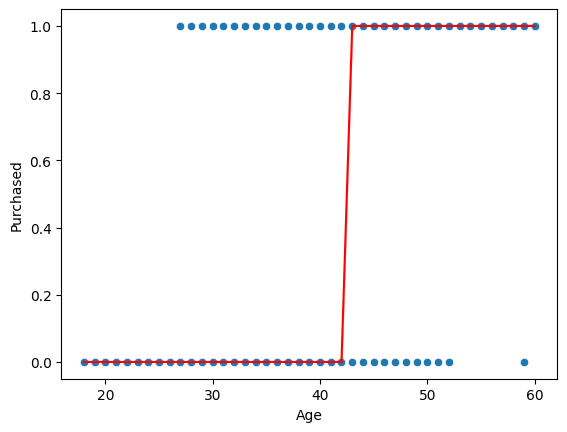

In [10]:
sns.scatterplot(x='Age', y='Purchased', data=dataset)
sns.lineplot(x='Age', y=lr.predict(x), data=dataset, color='red')

## Multiple Input 

In [11]:
dataset1 = pd.read_csv("placement_1.csv")
dataset1.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [12]:
print(dataset1.columns)

Index(['cgpa', 'resume_score', 'placed'], dtype='object')


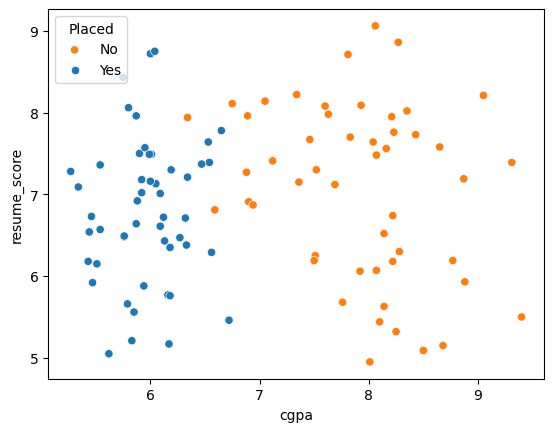

In [13]:

sns.scatterplot(data=dataset1, x='cgpa', y='resume_score', hue='placed')
plt.legend(title='Placed', loc='upper left', labels=['No', 'Yes'])


In [14]:
x = dataset1.iloc[:, :-1]  # All columns except the last one
y = dataset1["placed"]

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [17]:
lr.score(x_test, y_test)*100

100.0

In [18]:
lr.predict([[6.17, 5.17]])

c:\Users\Aamir Neyazi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

c:\Users\Aamir Neyazi\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


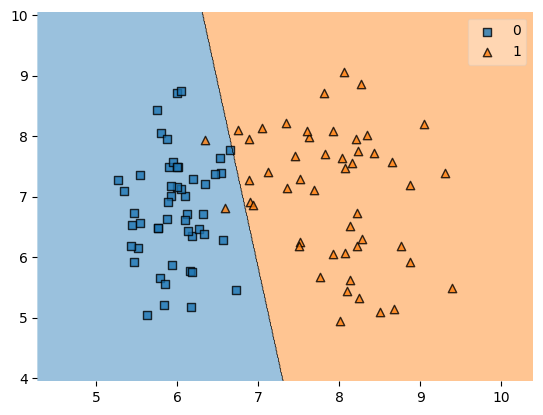

In [19]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf = lr)
plt.show()